# Exploitation vs Exploration

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization, Observer, Events

# use sklearn's default parameters for theta and random_start
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}

# Target function

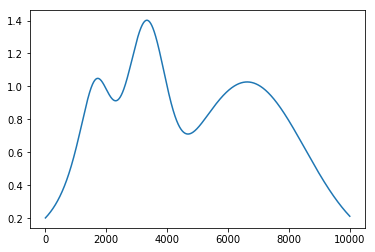

In [6]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)
f = np.exp(-(xs - 2)**2) + np.exp(-(xs - 6)**2/10) + 1/ (xs**2 + 1)

plt.plot(f)
plt.show()

## Utility function for plotting

In [7]:
def plot_bo(f, bo):
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean+sigma, mean-sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min()-0.1*(f.max()-f.min()), f.max()+0.1*(f.max()-f.min()))
    plt.show()

# Acquisition Function "Upper Confidence Bound"

## Prefer exploitation (kappa=1.0)

Note that most points are around the peak(s).

In [10]:

observer = Observer()

bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.register(Events.INIT_DONE, observer)
bo.register(Events.FIT_DONE, observer)
bo.register(Events.FIT_STEP_DONE, observer)

bo.maximize(init_points=2, n_iter=3, acq="ucb", kappa=1, **gp_params)
bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=1, **gp_params)

plot_bo(f, bo)

Initialization completed


TypeError: 'BayesianOptimization' object is not subscriptable

## Prefer exploration (kappa=10)

Note that the points are more spread out across the whole range.

In [ ]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=10, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Expected Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

/Users/fmfnogueira/venvs3/general/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


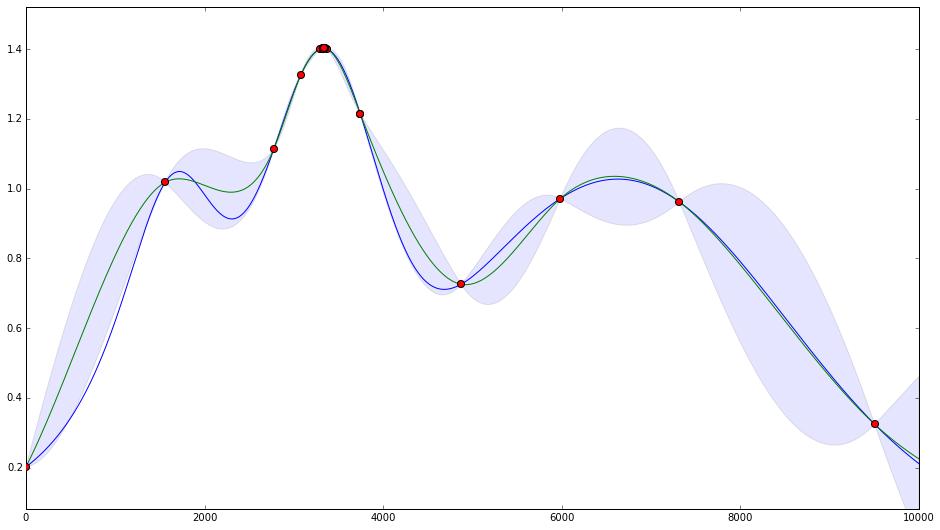

In [22]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

/Users/fmfnogueira/venvs3/general/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


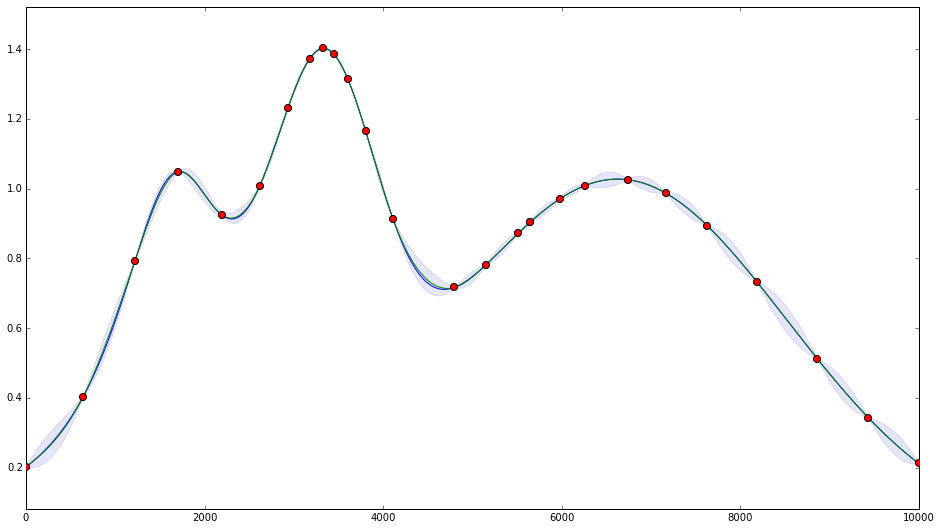

In [23]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=0.1, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Probability of Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

/Users/fmfnogueira/venvs3/general/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


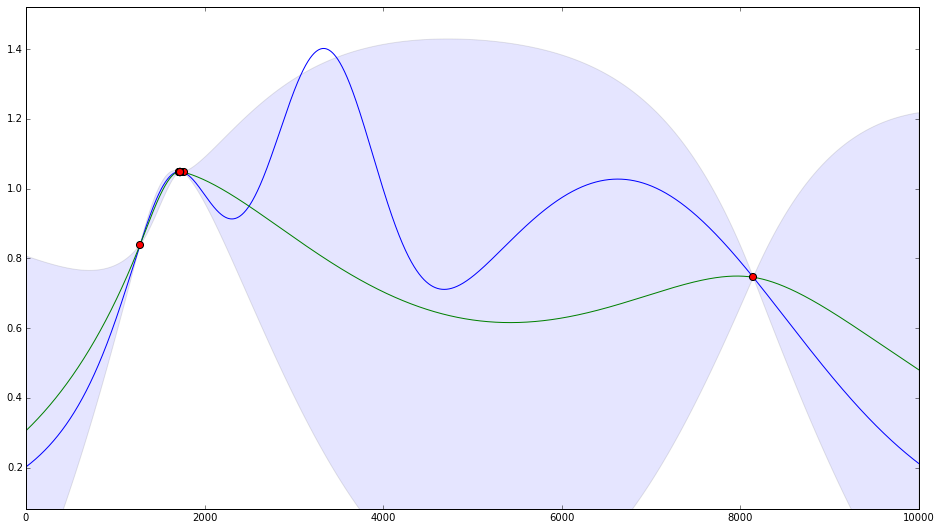

In [24]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

/Users/fmfnogueira/venvs3/general/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


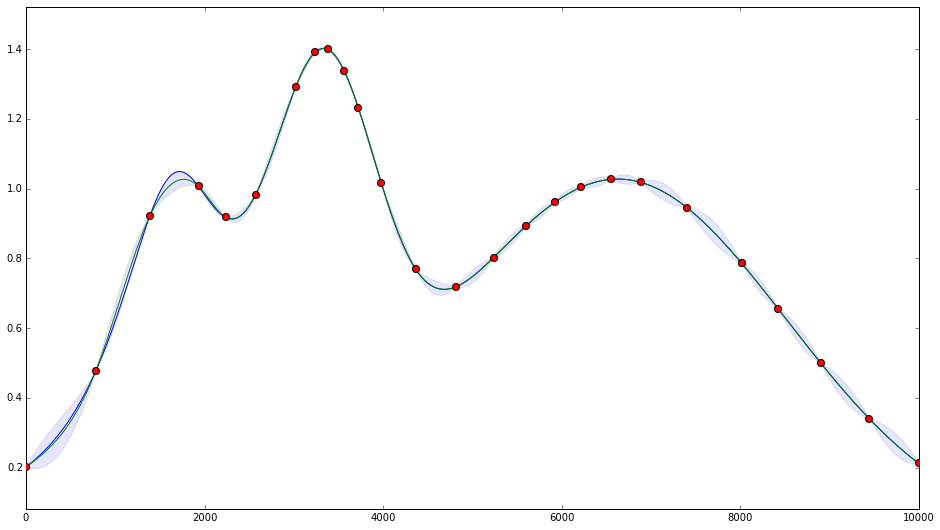

In [25]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=0.1, **gp_params)

plot_bo(f, bo)